## Partial Differential Equations

In [4]:
 %pylab notebook

Populating the interactive namespace from numpy and matplotlib


### Solving Laplace’s equation

<IPython.core.display.Javascript object>


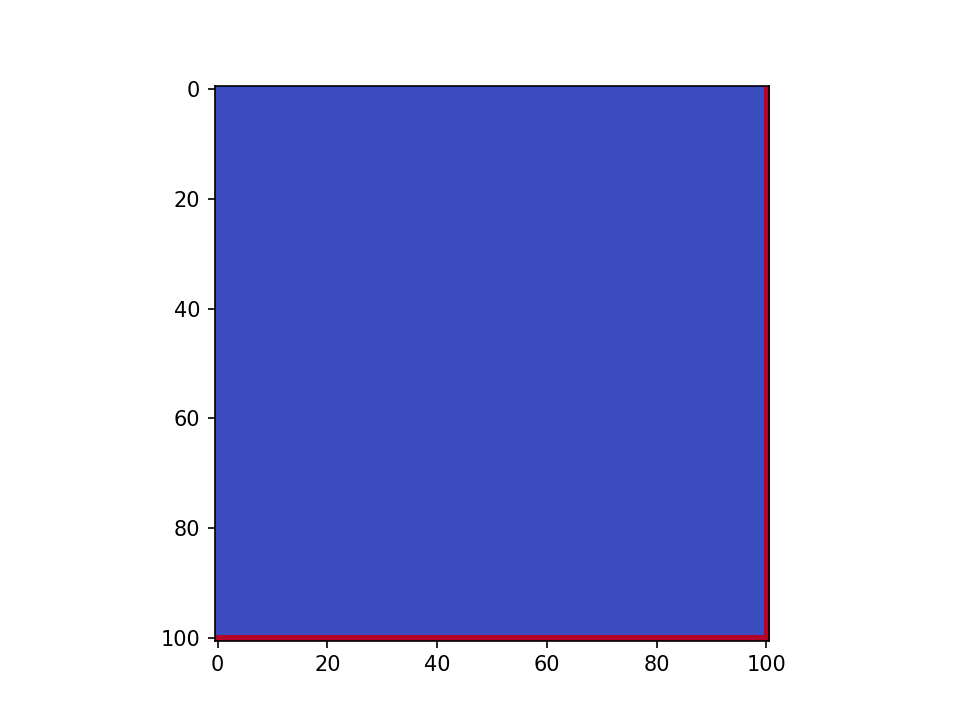

In [57]:
Nx=101
V=zeros((Nx,Nx)) #create array
V[-1]=1.
V[:,-1]=1.
imshow(V,cmap='coolwarm') #show how it looks, it has constant number in the vector

In [30]:
# Use jacabi update rule to solve for the potential

Vp = 1.*V
err = 1.
tol = 1.e-4

iter = 0 
while err>= tol*tol:
    iter+=1
    for i in range(1,Nx-1):
        for j in range(1,Nx-1):
            Vp[i,j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])  #
    err=amax((V-Vp)**2)
    V=1.*Vp
print(iter,sqrt(err))

2892 9.996026351388743e-05


<IPython.core.display.Javascript object>


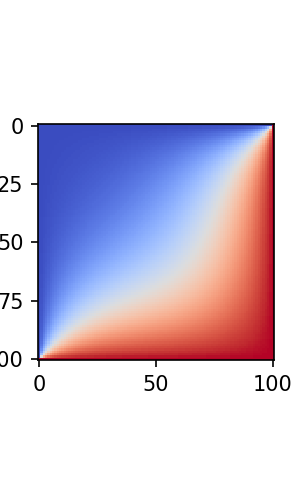

In [32]:
imshow(V,interpolation='None', cmap='coolwarm')

In [33]:
Nx=101
V=zeros((Nx,Nx))
V[-1]=1.
V[:,-1]=1.
#imshow(V,cmap='coolwarm')

In [34]:
# Use  Gauss-Seidel method to solve for the potential

Vp = 1.*V
err = 1.
tol = 1.e-4

iter = 0 
while err>= tol*tol:
    iter+=1
    for i in range(1,Nx-1):
        for j in range(1,Nx-1):
            Vp[i,j] = 0.25*(V[i+1,j]+Vp[i-1,j]+V[i,j+1]+Vp[i,j-1])
    err=amax((V-Vp)**2)
    V=1.*Vp
print(iter,sqrt(err))

2137 9.993336583730139e-05


<IPython.core.display.Javascript object>


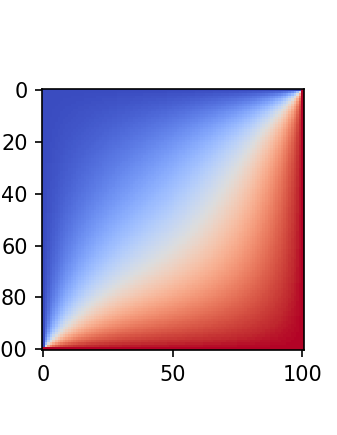

In [35]:
# so it was little faster, initial guess can affect to this. 
imshow(V,interpolation='None', cmap='coolwarm')

## Potential of a parallel plate capacitor

<IPython.core.display.Javascript object>


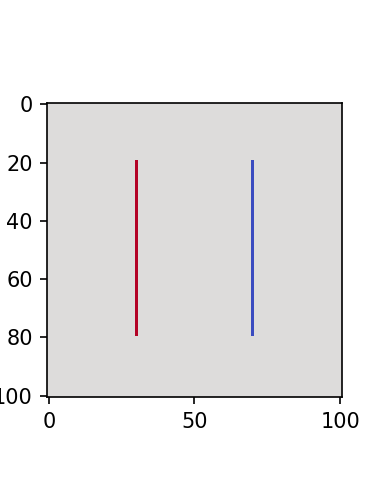

In [38]:
Nx=101
V=zeros((Nx,Nx))
V[20:80,30]=1.
V[20:80,70]=-1.
imshow(V,interpolation='None',cmap='coolwarm')

In [40]:
Vp = 1.*V
err = 1.
tol = 1.e-4

iter = 0 
while err>= tol*tol:
    iter+=1
    for i in range(1,Nx-1):
        for j in range(1,Nx-1):
            if (j!= 30) or (j!=70):
                Vp[i,j] = 0.25*(V[i+1,j]+Vp[i-1,j]+V[i,j+1]+Vp[i,j-1])
            elif (j< 20) or (i>80):
                Vp[i,j] = 0.25*(V[i+1,j]+Vp[i-1,j]+V[i,j+1]+Vp[i,j-1])

    err=amax((V-Vp)**2)
    V=1.*Vp
print(iter,sqrt(err))

188 9.968181268138823e-05


<IPython.core.display.Javascript object>


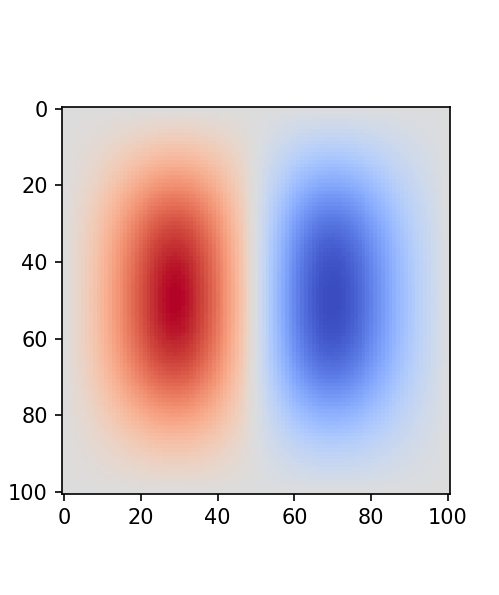

In [41]:
imshow(V,interpolation='None',cmap='coolwarm')

One can see how the potential decays away from the edges of the finite capacitor andhow the E field is only constant inthe interior portion

## Thermal diffusion through Earth

In [26]:
def T0(t,A,B,tau,phi):
    return A + B*sin(2*pi*t/tau + phi)

<IPython.core.display.Javascript object>


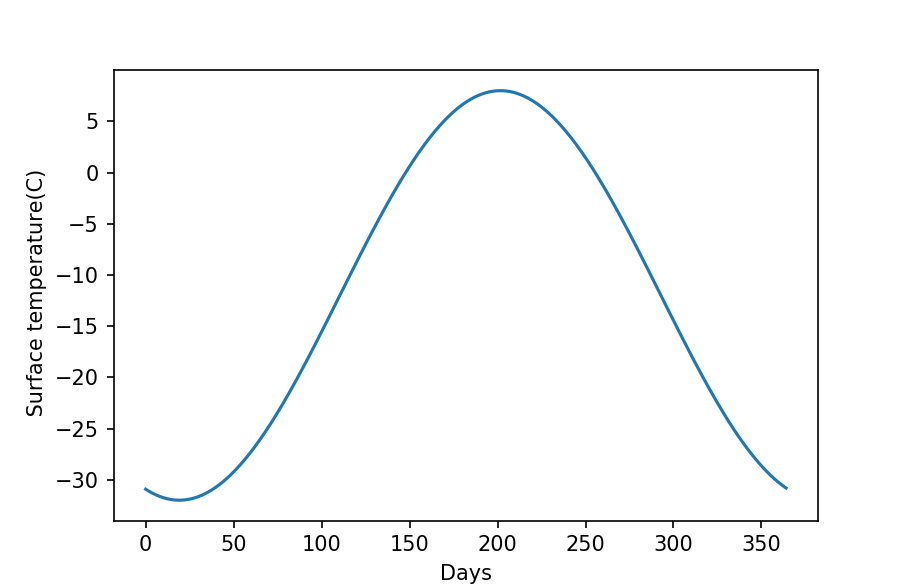

Text(0, 0.5, ' Surface temperature(C)')

In [27]:

A=-12.
B=20.
phi=-1.9
tau=365
ts = arange(0,tau)

plot(ts,T0(ts,A,B,tau,phi))
xlabel('Days')
ylabel(' Surface temperature(C)')

minimum temperature is around end of jauaruary, and highest temperature is around summer 8C.

In [28]:
Nx= 101
alpha = .1 #m^2/day -thermal diffusivity
L= 40
h=L/(Nx-1)

dtmax= h*h/2./alpha
print(dtmax)

0.8000000000000002


we need 0.8 dt smaller than 0.8 days for solving converge

In [29]:
mT=30/1000.
TL=A+mT*L
print(TL) 

-10.8


<IPython.core.display.Javascript object>


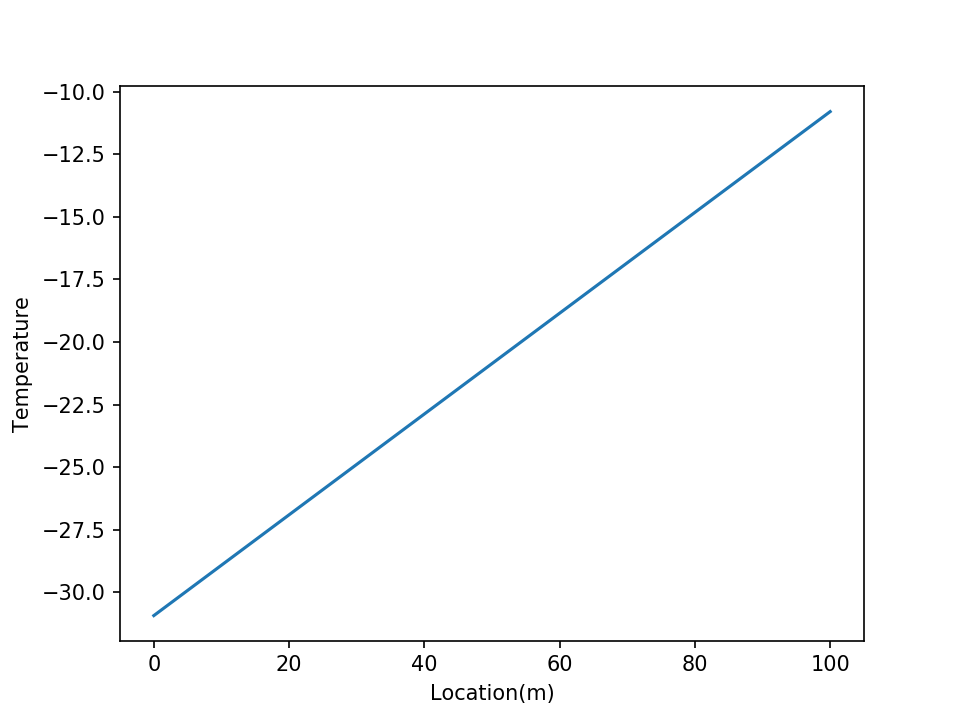

Text(0, 0.5, 'Temperature')

In [31]:
ux = zeros(Nx)
ux[0]=T0(0.0,A,B,tau,phi)
ux[-1] = TL

#equation of line u = T0+ (TL-T0)/L*x

for i in range(1,Nx-1):
    ux[i]=ux[0]+ (ux[-1]-ux[0])/(Nx-1)*i
    
plot(ux)
xlabel('Location(m)')
ylabel('Temperature')

In [32]:
dt=.4
Ttot=10*365. # 10years
Nt=int(Ttot/dt) # number of iterations
us=[ux] # store temperature profile result
t=0.
ts=[t]
uxp=zeros(len(ux)) #store updated profile for calculation
while t< Ttot:
    t+= dt
    # interior points 
    uxp[1:-1]=ux[1:-1]+alpha*dt/h/h*(ux[:-2]-2*ux[1:-1]+ux[2:])
    uxp[0]=T0(t,A,B,tau,phi)
    uxp[-1]=TL
    
    ux=1.*uxp
    us.append(ux)
    ts.append(t)
us=array(us)
ts=array(ts)
shape(us)

(9126, 101)

<IPython.core.display.Javascript object>


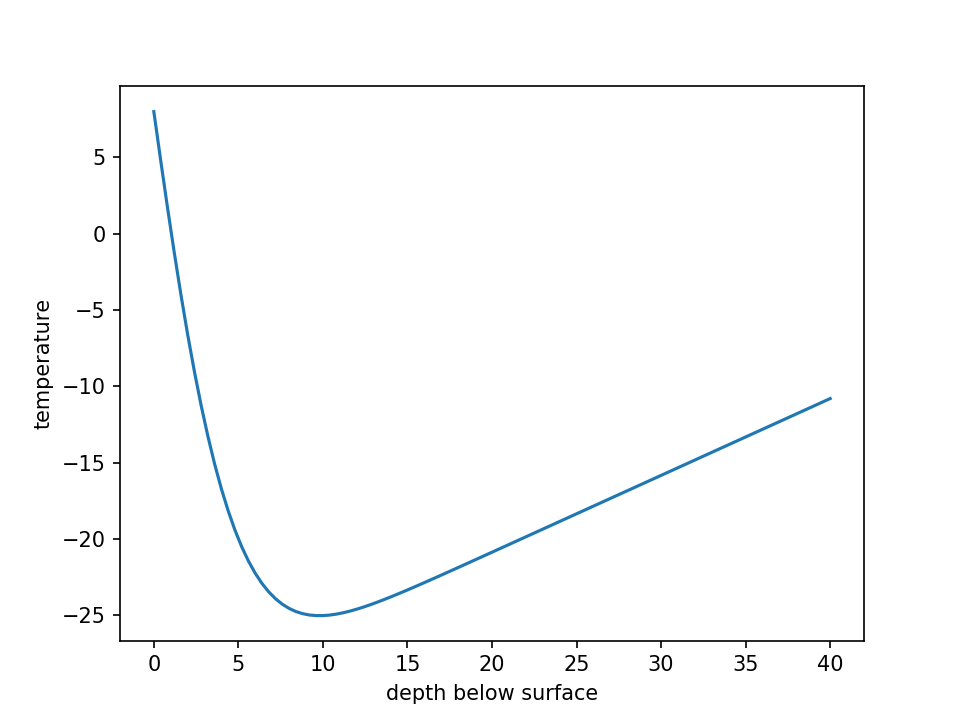

Text(0, 0.5, 'temperature')

In [33]:
#plot a profile

Ni= 500
xs=linspace(0,L,Nx)# x variable for graph
plot(xs,us[Ni])
xlabel("depth below surface")
ylabel("temperature")

so this graph represent the temperature changes with change in depth. 

In [34]:
#Using the 12 profiles from the last year, plot both the maximum and minimum yearly 

print(Nt/120) # this shows every (Nt/120)th day, we will get 12sample a year =120

76.04166666666667


In [35]:
usmap =us[::76,:]
shape(usmap)

(121, 101)

<IPython.core.display.Javascript object>


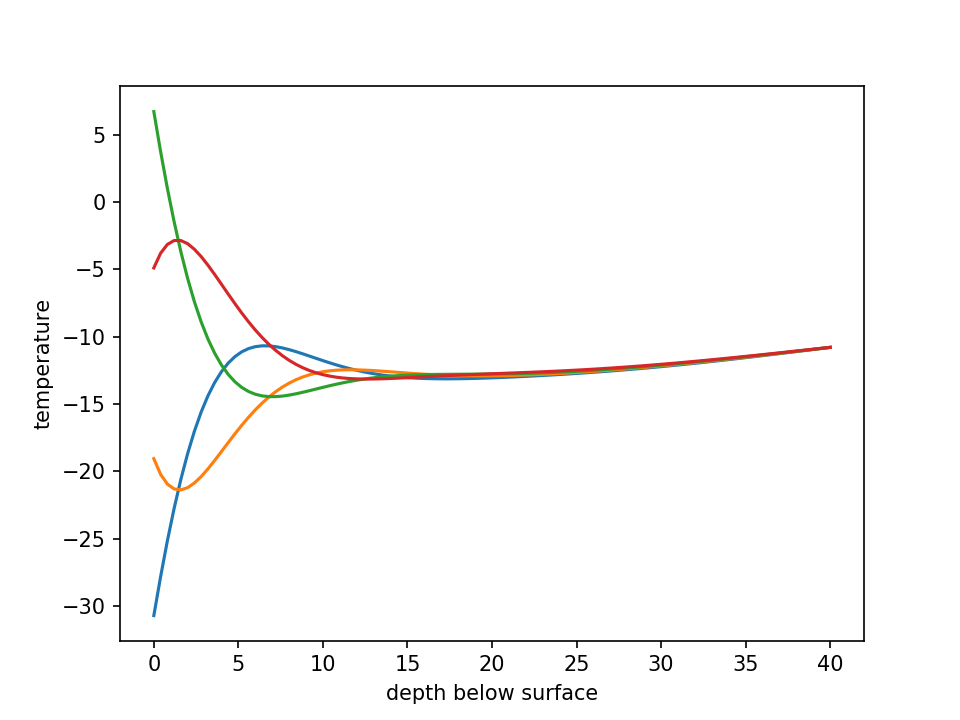

In [36]:
#plot the temperature profile in last year

for i in range (-12,0,3):
    plot(xs,usmap[i-1])
    xlabel("depth below surface")
    ylabel("temperature")

<IPython.core.display.Javascript object>


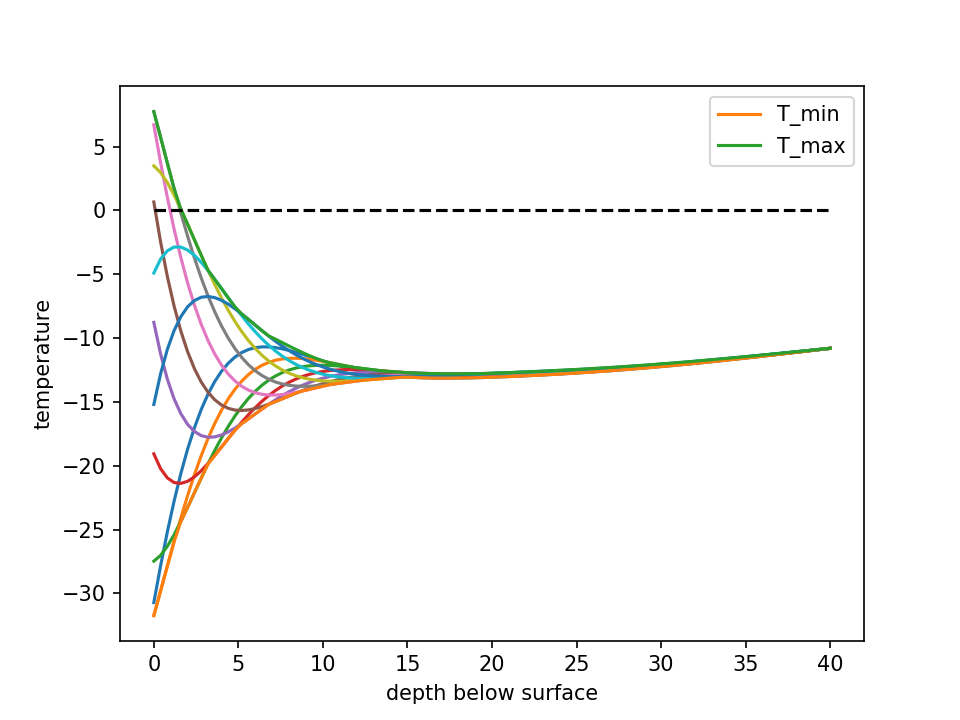

In [42]:
# max and min over whole year at each depth
for i in range (-12,-1):
    plot(xs,usmap[i-1])
    xlabel("depth below surface")
    ylabel("temperature")
Tmin=[]
Tmax=[]

for i in range(Nx):
    Tmin.append(amin(usmap[-13:-1,i]))#get the min temperature for i_th depth.
    Tmax.append(amax(usmap[-13:-1,i]))#get the max temperature for i_th depth.
plot(xs,Tmin,label='T_min')
plot(xs,Tmax,label='T_max')
plot([0,L],[0,0],'k--')
xlabel("depth below surface")
ylabel("temperature")
legend()

so for the max temperature as a function of depth, we see the variation at 2-3 m below the surface where the max temperature is always below zero

## Wave equation

In [1]:
from matplotlib import animation
from IPython.display import Audio

### Wave on a string

In [11]:
L = 0.65 # string length in m 
c = 254.8 # wave speed in m/s
Nx=51
A=.05 #in m
d= 0.5 #in m 
sigma = 0.3 #in m
xs = linspace(0.0, L, Nx) #make x-variable
u2 = zeros(Nx)

In [7]:
def u0u1(x,A,d,L,sigma): #define u 𝑢0(𝑥𝑖) = 𝑢1(𝑥𝑖)
    u0 = A*exp((x-d)**2/sigma/sigma)*xs*(L-x)/L/L
    u1 = 1.0*(u0)   # have the initial condition u(dt) = u(0)
    return u0,u1

In [15]:
u0,u1=u0u1(xs,A,d,L,sigma)

<IPython.core.display.Javascript object>


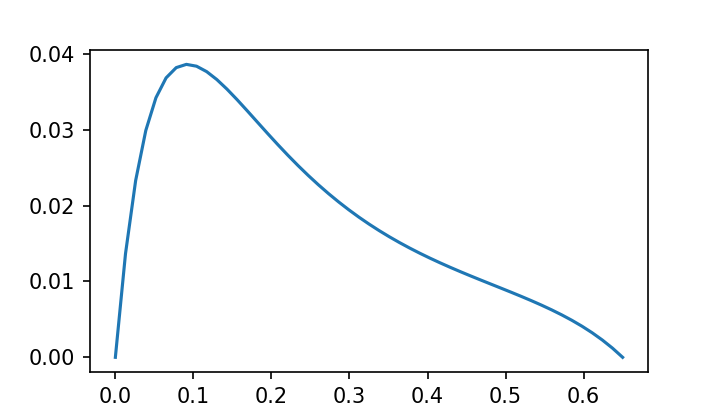

In [16]:
plot(xs,u0)


In [17]:
dt=1e-5
dx=L/(Nx-1) #Length divided by the (number of points -1)
Niter = round(5.0/dt)
Nsamp = round(1.0/dt/10000)  # 0000 samples/s
print(Niter,'iteration', Nsamp,"samples:", int(Niter/Nsamp))

500000 iteration 10 samples: 50000


In [21]:
us = [1.0*u0]

alpha = c*c*dt*dt/dx/dx

for i in range(2, Niter):
    u2[1:Nx-1] = 2.0*(1.0-alpha)*u1[1:Nx-1] - u0[1:Nx-1] + alpha*(u1[:Nx-2] + u1[2:Nx])  # update rule
    if i % Nsamp == 0:
        us.append(1.0*u2)
    u0 = 1.0*u1
    u1 = 1.0*u2
us = array(us)

<IPython.core.display.Javascript object>


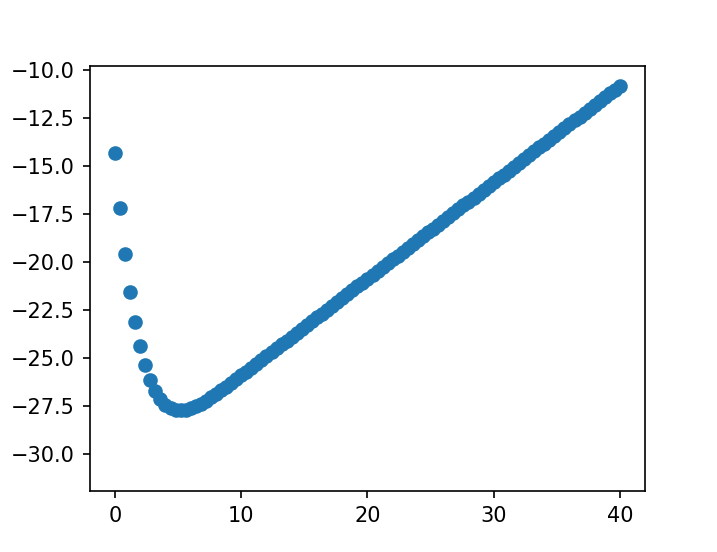

In [50]:
fig = figure()
scat = scatter(xs, us[0]) # 

# need an update functions
def update_plot(i):
    scat.set_offsets(concatenate((vstack(xs), vstack(us[i])), axis=1))    
    return 

ani = animation.FuncAnimation(fig, update_plot)

In [43]:
freq = 196.0
framerate = 10000
t = linspace(0,5,framerate*5)
data = sin(2*pi*freq*t)
Audio(data,rate=framerate)

In [52]:
Audio(data = us[:,15], rate=10000)

In [53]:
Audio(data = us[:,25], rate=10000)

In [54]:
Audio(data = us[:,45], rate=10000)

<IPython.core.display.Javascript object>


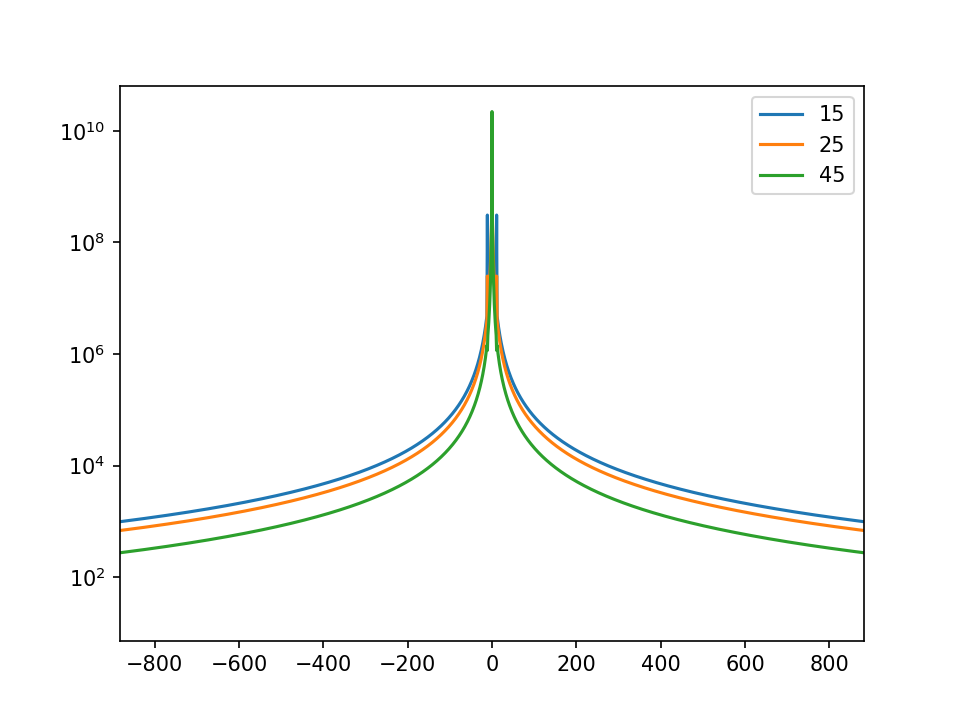

In [56]:
rate = 10000
fs = fft.fftfreq(len(us), 1./rate)
idx = argsort(fs)
ak = fft.fft(us[:,15]) # point 15
plot(fs[idx], abs(ak[idx])**2)
ak = fft.fft(us[:,25]) # point 25
plot(fs[idx], abs(ak[idx])**2)

ak = fft.fft(us[:,45]) # point 45
plot(fs[idx], abs(ak[idx])**2)
xlim(-4.5*196, 4.5*196)
yscale('log')
legend((15, 25, 45), loc=0)